In [2]:
import sim
import numpy as np
import matplotlib.pyplot as plt

### Set

In [3]:
### Set initialization parameters ###

# Inital populations  are homogenous, i.e. equal in each cell.
A_init = 200  
B_init = 75

In [4]:
### Set the rate parameters  ###

# Birth parameter for species A
mu = 1

# Birth parameter for species B
beta = 3


# Death parameter for species A
alpha = 0.02


# Reaction parameter for "2A + B -> 3A" 
kappa = 1e-6


# Diffusion parameters for species A and B
d_A = 1.6
d_B = 160

# Store all the parameters in a dictionary
params = {'mu': mu, 'beta': beta, 'alpha': alpha, 'kappa': kappa, 
          'd_A': d_A, 'd_B': d_B}

In [18]:
#### Set gridsize parameters ###

m = 1  # number of rows
n = 200 # number of columns

In [38]:
### Set the time interval ###

tau = .001

In [42]:
### Set runtime parameter ###

N_t = 100000  # number of units of time

### Run

In [43]:
# Initialize the grid of cells for A and B populations
shape = (N_t, m, n)  # index by time, row, column

X_A = np.zeros(shape)  # set A population at all times to zero (simplicity)
X_A[0] += A_init  # add initial A population for time zero

X_B = np.zeros(shape)  # do the same as above for B...
X_B[0] += B_init


# Loop through time
for t in np.arange(N_t-1):
    # if t % 10 == 0:
        # plt.imshow(X_A[t])
        # plt.show()
        
    sim.calculate(tau, X_A, X_B, t, **params)

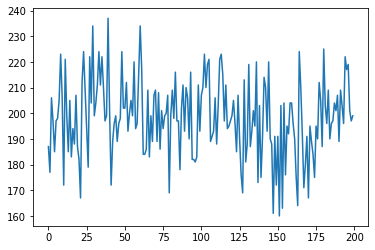

In [44]:
plt.plot(X_A[-1].ravel())

In [10]:
X_A[-1].std()

51.14193978402969

In [11]:
X_B[-1]

array([[31., 36., 28., ..., 39., 35., 33.],
       [35., 45., 44., ..., 44., 55., 33.],
       [40., 36., 32., ..., 49., 37., 33.],
       ...,
       [33., 27., 35., ..., 43., 31., 43.],
       [33., 38., 31., ..., 29., 44., 31.],
       [36., 32., 37., ..., 40., 40., 28.]])

In [12]:
X_B[-1].std()

6.581336745629643